# CSE 158: Assignment 2

## Part 1: Introduction

## Part 2: Exploratory Data Analysis

In [21]:
import gzip
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
def parse(path):
  g = gzip.open(path, 'r')
  for l in g:
    yield eval(l, {"true": True, "false": False})

In [4]:
# Takes about 1-2 minutes to run
data = parse('goodreads_reviews_spoiler.json.gz')
data = list(data)

In [5]:
for i in data:
    datum = dict(i)
    break

In [7]:
for i in datum:
    print(i)

user_id
timestamp
review_sentences
rating
has_spoiler
book_id
review_id


In [10]:
datum['review_sentences']

[[0, 'This is a special book.'],
 [0,
  'It started slow for about the first third, then in the middle third it started to get interesting, then the last third blew my mind.'],
 [0,
  'This is what I love about good science fiction - it pushes your thinking about where things can go.'],
 [0,
  "It is a 2015 Hugo winner, and translated from its original Chinese, which made it interesting in just a different way from most things I've read."],
 [0,
  'For instance the intermixing of Chinese revolutionary history - how they kept accusing people of being "reactionaries", etc.'],
 [0, 'It is a book about science, and aliens.'],
 [0,
  'The science described in the book is impressive - its a book grounded in physics and pretty accurate as far as I could tell.'],
 [1,
  'Though when it got to folding protons into 8 dimensions I think he was just making stuff up - interesting to think about though.'],
 [1,
  'But what would happen if our SETI stations received a message - if we found someone wa

In [8]:
datum['has_spoiler']

True

In [15]:
df = pd.DataFrame(data)
df.head()

,user_id,timestamp,review_sentences,rating,has_spoiler,book_id,review_id
0,8842281e1d1347389f2ab93d60773d4d,2017-08-30,"[[0, This is a special book.], [0, It started ...",5,True,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb
1,8842281e1d1347389f2ab93d60773d4d,2017-03-22,"[[0, Recommended by Don Katz.], [0, Avail for ...",3,False,16981,a5d2c3628987712d0e05c4f90798eb67
2,8842281e1d1347389f2ab93d60773d4d,2017-03-20,"[[0, A fun, fast paced science fiction thrille...",3,True,28684704,2ede853b14dc4583f96cf5d120af636f
3,8842281e1d1347389f2ab93d60773d4d,2016-11-09,"[[0, Recommended reading to understand what is...",0,False,27161156,ced5675e55cd9d38a524743f5c40996e
4,8842281e1d1347389f2ab93d60773d4d,2016-04-25,"[[0, I really enjoyed this book, and there is ...",4,True,25884323,332732725863131279a8e345b63ac33e


Are people more likely to give spoilers in their reviews if they rate it high?

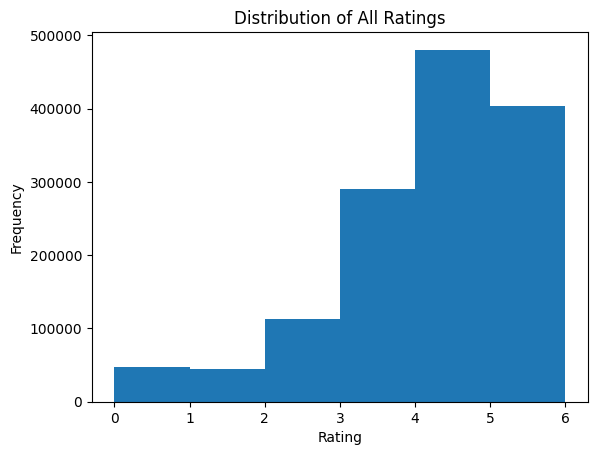

In [25]:
# Distribution of all ratings
all_ratings = df['rating']
plt.hist(all_ratings, bins=np.arange(0, 7))
plt.title('Distribution of All Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [32]:
# Some basic statistical information for all ratings
print("All Ratings Statistics:")
print(f"Mean: {np.mean(all_ratings)}")
print(f"Median: {np.median(all_ratings)}")
print(f"Standard Deviation: {np.std(all_ratings)}")

All Ratings Statistics:
Mean: 3.6850786592193367
Median: 4.0
Standard Deviation: 1.2524545394993913


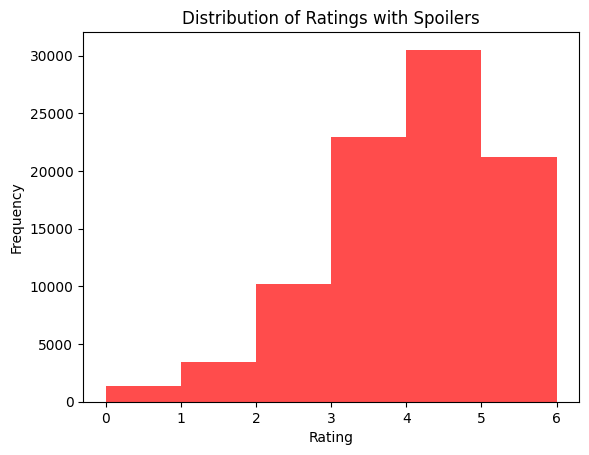

In [30]:
# Distribution of ratings with spoilers
spoiler_ratings = df[df['has_spoiler'] == True]['rating']
plt.hist(spoiler_ratings, bins=np.arange(0, 7), color='red', alpha=0.7)
plt.title('Distribution of Ratings with Spoilers')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [33]:
# Some basic statistical information for ratings with spoilers
print("Spoiler Ratings Statistics:")
print(f"Mean: {np.mean(spoiler_ratings)}")
print(f"Median: {np.median(spoiler_ratings)}")
print(f"Standard Deviation: {np.std(spoiler_ratings)}")

Spoiler Ratings Statistics:
Mean: 3.577259084873978
Median: 4.0
Standard Deviation: 1.1659179142832385


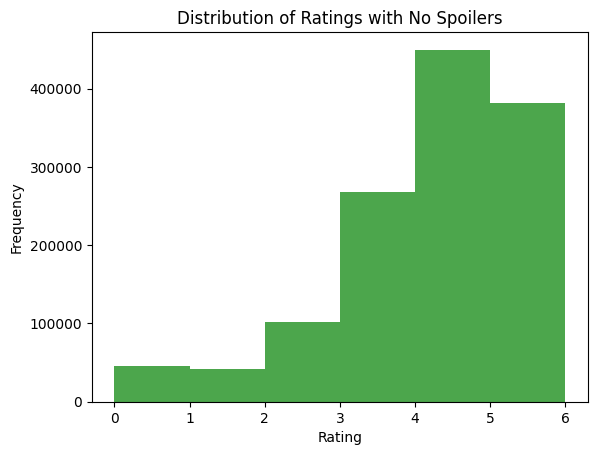

In [31]:
# Distribution of ratings with no spoilers
no_spoiler_ratings = df[df['has_spoiler'] == False]['rating']
plt.hist(no_spoiler_ratings, bins=np.arange(0, 7), color='green', alpha=0.7)
plt.title('Distribution of Ratings with No Spoilers')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [34]:
# Some basic statistical information for ratings with no spoilers
print("Non-Spoiler Ratings Statistics:")
print(f"Mean: {np.mean(no_spoiler_ratings)}")
print(f"Median: {np.median(no_spoiler_ratings)}")
print(f"Standard Deviation: {np.std(no_spoiler_ratings)}")

Non-Spoiler Ratings Statistics:
Mean: 3.692579047287889
Median: 4.0
Standard Deviation: 1.2579092503297786


Maybe if a book was not very enjoyable, people would spoil the plot so that others can save time/money. If a book was actually enjoyable, people would let people experience it for themselves.

Next step: maybe we can engineer a feature that is the proportion of sentences that are rated a spoiler?

## Part 3: Modeling

## Part 4: Evaluation

## Part 5: Discussion